In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
from scipy import linalg
from scipy.optimize import *
import itertools
from math import factorial

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Практические задания к уроку 5
## Тема “Элементы теории вероятностей”


### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [3]:
n = int(input('Число попыток: '))
for i in range(n):
        a = np.random.randint(0, 38)
        print (a, 'Zero' if a == 0 else 'Red' if a %2 == 0 else 'Black')
        i += 1

Число попыток: 7
21 Black
19 Black
0 Zero
23 Black
26 Red
21 Black
29 Black


### 2. 
1) Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

In [4]:
k, m = 0, 0
n = 1000
for i in range(n):
    x = np.random.uniform(0, 101)
    if x <= 50:
        k += 1
    else:
        m += 1
print(k, m)
print(k/n + m/n)

488 512
1.0


2) Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

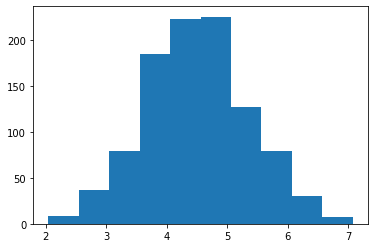

In [5]:
sum_ = []
array_ = [0 for i in range(0, 1000)]
for i in range(0, 9):
    x = np.random.rand(1000)
    sum_.append(x)

for i in sum_:
        array_ = array_ + i

num_bins = 10
plt.hist(array_, num_bins)
plt.show()

### 3.

1) Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.


In [6]:
k, n = 0,10000
a = np.random.randint(0,2, n)
b = np.random.randint(0,2, n)
c = np.random.randint(0,2, n)
d = np.random.randint(0,2, n)
x = a + b + c + d

for i in range(0,n):
    if x[i] == 2:
        k = k + 1

print(k, n, k/n)
Cn_k = factorial(4)/ (factorial(2)*factorial(4-2))
Pn_k = Cn_k * (1/2**4)
print("Pn(k) = ",Pn_k)

3793 10000 0.3793
Pn(k) =  0.375


2) Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [7]:
k, n = 0,10000
a = np.random.randint(0,2, n)
b = np.random.randint(0,2, n)
c = np.random.randint(0,2, n)
d = np.random.randint(0,2, n)
e = np.random.randint(0,2, n)
x = a + b + c + d + e

for i in range(0,n):
    if x[i] == 2:
        k = k + 1

print(k, n, k/n)
Cn_k = factorial(5)/ (factorial(2)*factorial(5-2))
Pn_k = Cn_k * (1/2**5)
print("Pn(k) = ",Pn_k)

3102 10000 0.3102
Pn(k) =  0.3125


### 4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [8]:
x1, y1 = '0123', 3
x2, y2 = '45678', 4
x3, y3 = '901234', 5
x4, y4 = '5678901', 6
for p in itertools.permutations(x1, y1):
    print(''.join(str(x) for x in p))

012
013
021
023
031
032
102
103
120
123
130
132
201
203
210
213
230
231
301
302
310
312
320
321


### 5. Дополните код расчетом коэффициента корреляции x и y по формуле

-4.275759799052738e-05 0.5166169641678003
-4.609917352295194e-05


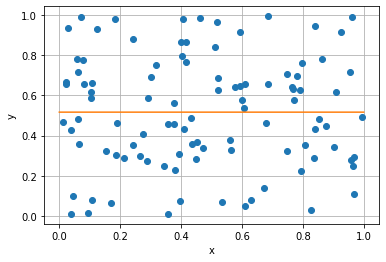

In [9]:
n = 100
m = 100

x = np.random.rand(n)
y = np.random.rand(m)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

A = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(A, y)[0]

r = (sum((x-np.average(x))*(y-np.average(y))))/math.sqrt((np.sum((x-np.average(x))**2))*(np.sum((y-np.average(y))**2)))

print(a, b)
print(r)

plt.plot([0, 1], [b, a + b]);